# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
#
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
#
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

# Import csv

In [2]:
data = pd.read_csv("../../tresboncoin/data/master_with_fuzzy_and_cleaning_old.csv")

# Exploring data

## Basic exploration

In [3]:
data.head(12)

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,...,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db
0,https://www.motoplanete.com/occasion-moto/3764...,motoplanete-37642,kawasaki,2021,476.0,Trail,16999.0,versys10002020,1000.0,2021/06/04 - 22h18,...,1990.0,sport touring,in-line four,997.0,92.0,NaN,10.2:1,Liquid,NaN,NaN
1,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,...,2018.0,naked bike,in-line three,847.0,115.0,61.5,11.5:1,Liquid,NaN,NaN
2,https://www.motoplanete.com/occasion-moto/1536...,motoplanete-15360,yamaha,2016,2600.0,Custom,8500.0,xv950bolt,950.0,2021/06/04 - 22h18,...,2021.0,custom / cruiser,v2,942.0,NaN,80.4,9.0:1,Air,NaN,NaN
3,https://www.motoplanete.com/occasion-moto/4082...,motoplanete-40822,kawasaki,2009,20000.0,Routière & GT,8490.0,zzr,1400.0,2021/06/04 - 22h18,...,2015.0,sport,in-line four,1441.0,200.0,162.5,12.3:1,Liquid,NaN,NaN
4,https://www.motoplanete.com/occasion-moto/3248...,motoplanete-32485,harleydavidson,2014,11500.0,Custom,17200.0,softailslim,1584.0,2021/06/04 - 22h18,...,2016.0,custom / cruiser,v2,1801.0,92.5,145.0,9.5:1,Air,308.0,0.3003
5,https://www.motoplanete.com/occasion-moto/3299...,motoplanete-32992,ducati,2004,73301.0,Routière & GT,2999.0,st3,992.0,2021/06/04 - 22h18,...,2004.0,sport touring,v2,992.0,102.0,93.0,10.0:1,Liquid,NaN,NaN
6,https://www.motoplanete.com/occasion-moto/4225...,motoplanete-42257,ducati,2019,750.0,Roadster,10500.0,monster821,821.0,2021/06/04 - 22h18,...,2019.0,naked bike,v2,821.0,109.0,86.0,12.8:1,Air,180.5,0.6039
7,https://www.motoplanete.com/occasion-moto/4156...,motoplanete-41568,kawasaki,2016,23717.0,Sportive,11990.0,zzr1400,1400.0,2021/06/04 - 22h18,...,2015.0,sport,in-line four,1441.0,200.0,162.5,12.3:1,Liquid,NaN,NaN
8,https://www.motoplanete.com/occasion-moto/4212...,motoplanete-42127,suzuki,2018,12250.0,Trail,9990.0,dl1000vstrom,1000.0,2021/06/04 - 22h18,...,2003.0,enduro / offroad,v2,996.0,98.0,101.0,11.3:1,Liquid,207.0,0.4734
9,https://www.motoplanete.com/occasion-moto/2904...,motoplanete-29049,motoguzzi,2010,8407.0,Routière & GT,7490.0,norge1200,1200.0,2021/06/04 - 22h18,...,2009.0,touring,v2,1151.0,88.5,100.0,9.8:1,Air,246.0,0.3598


In [4]:
data.shape

(12515, 23)

In [5]:
data["category_db"].value_counts()

scooter                      3173
naked bike                   1858
sport                        1670
sport touring                1007
allround                      940
touring                       849
enduro / offroad              795
classic                       678
custom / cruiser              621
super motard                  471
cross / motocross             156
unspecified category          130
atv                            63
prototype / concept model      53
trial                          38
minibike, cross                13
Name: category_db, dtype: int64

## Duplicates

In [6]:
size_before = len(data)
data = data.drop_duplicates()
size_after = len(data)
print(str(size_before - size_after) + " duplicates were removed.")

0 duplicates were removed.


## Missing

In [7]:
100 * data.isnull().sum().sort_values(ascending=False)/len(data)

power/weight_ratio_db    54.542549
dry_weight_db            47.854575
torque_db                26.480224
compression_db           24.586496
power_db                 16.124650
cooling_system_db         5.769077
bike_type                 1.070715
engine_size_db            0.407511
url                       0.047942
engine_type_db            0.015981
date_scrapped             0.000000
brand_db                  0.000000
uniq_id                   0.000000
model_submodel_db         0.000000
year_db                   0.000000
category_db               0.000000
engine_size               0.000000
model                     0.000000
price                     0.000000
mileage                   0.000000
bike_year                 0.000000
brand                     0.000000
model_db                  0.000000
dtype: float64

## Distribution and outliers

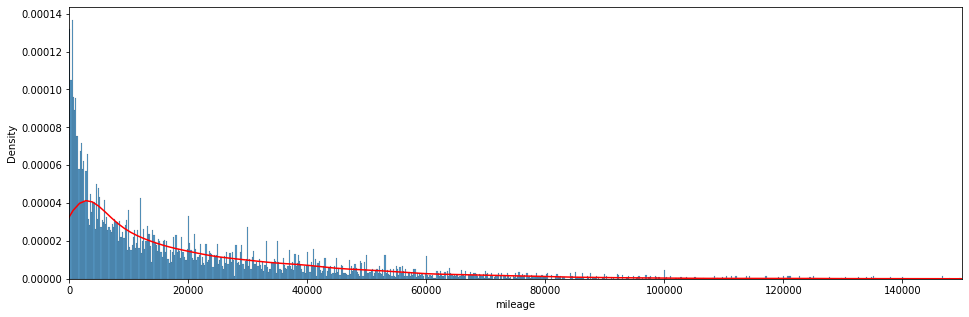

In [8]:
fig = plt.figure(figsize=(16, 5))
sns.histplot(data["mileage"], palette='Blues', stat='density', bins=1000)
sns.kdeplot(data["mileage"], color='red')
plt.xlim(0, 150000);

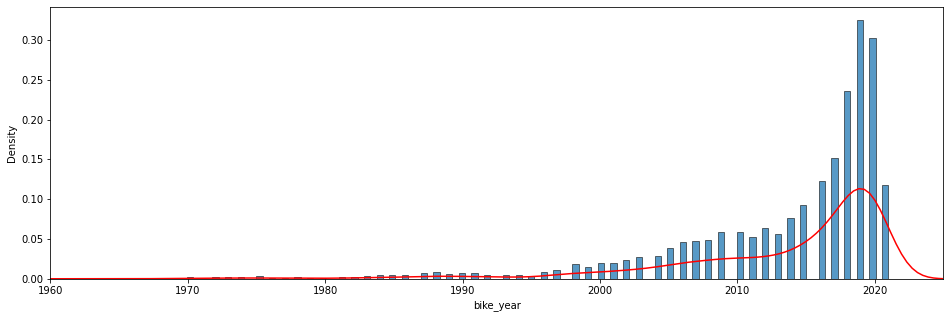

In [9]:
fig = plt.figure(figsize=(16, 5))
sns.histplot(data["bike_year"], palette='Blues', stat='density', bins=150)
sns.kdeplot(data["bike_year"], color='red')
plt.xlim(1960, 2025);

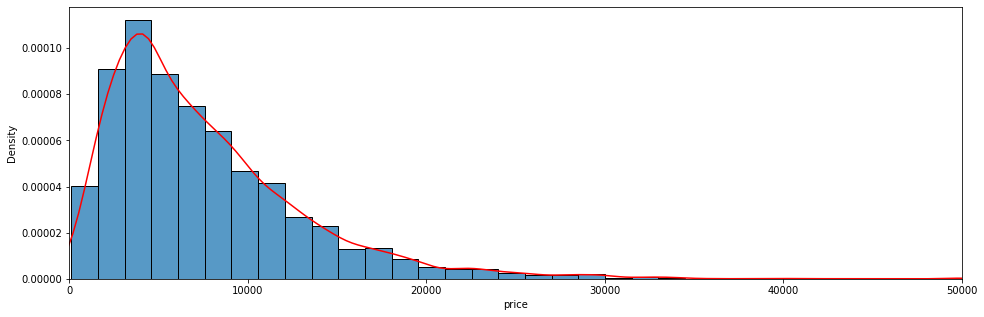

In [10]:
fig = plt.figure(figsize=(16, 5))
sns.histplot(data["price"], palette='Blues', stat='density', bins=40)
sns.kdeplot(data["price"], color='red')
plt.xlim(0, 50000);

(0.0, 75000.0)

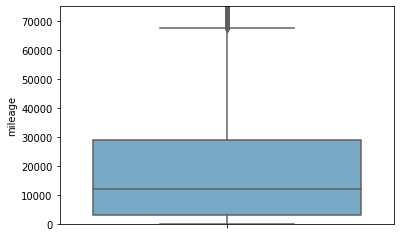

In [11]:
sns.boxplot(y=data["mileage"], palette="Blues");
plt.ylim(0, 75000)

(1960.0, 2022.0)

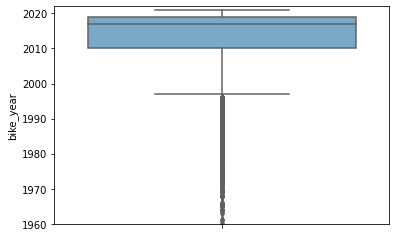

In [12]:
sns.boxplot(y=data["bike_year"], palette="Blues");
plt.ylim(1960, 2022)

(0.0, 50000.0)

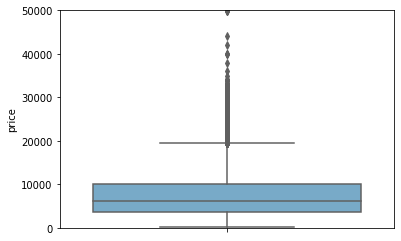

In [13]:
sns.boxplot(y=data["price"], palette="Blues");
plt.ylim(0, 50000)

# Cleaning

In [14]:
data = pd.read_csv("../../tresboncoin/data/master_with_fuzzy_and_cleaning_old.csv")

In [15]:
data.columns

Index(['url', 'uniq_id', 'brand', 'bike_year', 'mileage', 'bike_type', 'price',
       'model', 'engine_size', 'date_scrapped', 'brand_db', 'model_db',
       'model_submodel_db', 'year_db', 'category_db', 'engine_type_db',
       'engine_size_db', 'power_db', 'torque_db', 'compression_db',
       'cooling_system_db', 'dry_weight_db', 'power/weight_ratio_db'],
      dtype='object')

In [16]:
#data = data[~data["brand_db"].isnull()]
#data = data[~data["model_db"].isnull()]
#data = data[~data["type_db"].isnull()]
data = data[~data["category_db"].isnull()]
data = data[(data["bike_year"]>=1970) & (data["bike_year"]<=2022)]
data = data[(data["mileage"]>=1000) & (data["mileage"]<=80000)]
data = data[(data["price"]>=1000) & (data["price"]<30000)]

In [17]:
def km_per_year(km, bike_year):
    if (datetime.now().year - bike_year) == 0:
        return km
    return km / (datetime.now().year - bike_year)

In [18]:
#data.drop(['url', 'uniq_id', 'model_db', 'brand', "model", "brand_db"], axis=1, inplace=True)
data['km/year'] = data.apply(lambda x: km_per_year(x['mileage'], x['bike_year']), axis=1)

In [19]:
data.head(1)

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,...,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db,km/year
1,https://www.motoplanete.com/occasion-moto/1139...,motoplanete-11392,yamaha,2019,2500.0,Routière & GT,13490.0,niken,847.0,2021/06/04 - 22h18,...,naked bike,in-line three,847.0,115.0,61.5,11.5:1,Liquid,NaN,NaN,1250.0



# Preparing model inputs

In [161]:
pd.DataFrame(data["brand_db"].value_counts()).shape

(84, 1)

In [162]:
data_reduced = data[data["brand_db"].isin(list(pd.DataFrame(data["brand_db"].value_counts())[0:50].index))]

In [163]:
X = data_reduced.copy()[['brand_db', 'bike_year','mileage','engine_size','km/year']]
X.dropna(inplace=True)
y = data_reduced["price"]
X.shape

(10491, 5)

In [164]:
100 * X.isnull().sum().sort_values(ascending=False)/len(X)

brand_db       0.0
bike_year      0.0
mileage        0.0
engine_size    0.0
km/year        0.0
dtype: float64

# Pipelines

In [174]:
pipe_multiclass = Pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown="ignore"))
])

In [175]:
list(X.columns)

['brand_db', 'bike_year', 'mileage', 'engine_size', 'km/year']

In [176]:
# applying encoder
encoder = ColumnTransformer([
    ('textual', pipe_multiclass, ["brand_db"])
], remainder='passthrough')

In [177]:
# full preprocessor pipeline
preprocessor = Pipeline([("encoder", encoder),
                         ('scaler', MinMaxScaler())])

In [178]:
#output_pipe_columns = ["category_db_dual sport", "category_db_off-road", "category_db_scooter", "category_db_street", 'bike_year', 'mileage', 'km/year']

In [179]:
#X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X), columns=output_pipe_columns)
#X_train_scaled.tail()

In [194]:
final_pipeline_ETR = Pipeline([
                          ("preprocessor", preprocessor),
                          ('model', ExtraTreesRegressor())
                         ])

In [204]:
final_pipeline_KNN = Pipeline([
                          ("preprocessor", preprocessor),
                          ('model', KNeighborsRegressor(n_neighbors=2))
                         ])

In [ ]:
def custom_rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true - y_pred)))
rmse = make_scorer(custom_rmse, greater_is_better=False)

# Baseline score

## Extra tree regressor

In [182]:
baseline = cross_validate(final_pipeline_ETR,
                          X,
                          y,
                          scoring={"rmse": rmse, "r2": "r2"},
                          cv=20)
baseline_r2 = baseline['test_r2'].mean()
baseline_rmse = -baseline['test_rmse'].mean()

In [183]:
print(baseline_r2, baseline_rmse)

0.8785761230053681 1725.9726226220423


## KNN regressor

In [205]:
baseline_KNN = cross_validate(final_pipeline_KNN,
                          X,
                          y,
                          scoring={"rmse": rmse, "r2": "r2"},
                          cv=20)
baseline_KNN_r2 = baseline_KNN['test_r2'].mean()
baseline_KNN_rmse = -baseline_KNN['test_rmse'].mean()

In [206]:
print(baseline_KNN_r2, baseline_KNN_rmse)

0.7710877266045971 2380.7636619692594


# Optimized score

## Extra tree regressor

In [184]:
######################################################
# extra tree regressor parameters
######################################################
grid_ETR = {'model__max_depth': stats.randint(1, 1000),
            'model__min_samples_split': [2, 4, 6, 8, 10],
            "preprocessor__scaler": [StandardScaler(), RobustScaler(), MinMaxScaler()]
            }
params_ETR = {"random_grid_search": grid_ETR,
              "model": ExtraTreesRegressor()}
######################################################

In [185]:
model_optimized_ETR = RandomizedSearchCV(final_pipeline_ETR,
                                         grid_ETR,
                                         scoring="r2",
                                         n_iter=10,
                                         cv=10,
                                         n_jobs=-1,
                                         verbose=1)
model_optimized_ETR.fit(X, y)
optimized_ETR_r2 = model_optimized_ETR.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [186]:
print(optimized_ETR_r2)

0.8774051549848172


## KNN regressor

In [197]:
######################################################
# KNN model
######################################################
grid_KNN = {'model__n_neighbors': stats.randint(1, 1000),
            "preprocessor__scaler": [StandardScaler(), RobustScaler(), MinMaxScaler()]
            }
params_KNN = {"random_grid_search": grid_KNN,
              "model": KNeighborsRegressor()}
######################################################

In [200]:
model_optimized_KNN = RandomizedSearchCV(final_pipeline_KNN,
                                         grid_KNN,
                                         scoring="r2",
                                         n_iter=100,
                                         cv=10,
                                         n_jobs=-1,
                                         verbose=1)
model_optimized_KNN.fit(X, y)
optimized_KNN_r2 = model_optimized_KNN.best_score_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Users/victor/.pyenv/versions/3.9.1/envs/tresboncoin/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [201]:
print(optimized_KNN_r2)

0.7746547494254196


# Predict

In [188]:
list(X.columns)

['brand_db', 'bike_year', 'mileage', 'engine_size', 'km/year']

In [191]:
X_pred = pd.DataFrame({"brand_db": ["yamaha"],
                       "bike_year": [2019],
                       "mileage": [10000],
                       "engine_size": [250],
                       "km/year": [249],
                       })

In [192]:
model_optimized.best_estimator_.predict(X_pred)

array([6173.1865])